# E-Commerce Shipping Analysis
## *Exploratory Data Analysis*
### *Mini Project 1*
> Author: Ng Soo Kuan

### **Metadata of the dataset**

- ID: ID Number of Customers
- Warehouse_block: The Company have big Warehouse which is divided in to block such as A,B,C,D,E.
- Mode_of_Shipment: The Company Ships the products in multiple way such as Ship, Flight and Road.
- Customer_care_calls: The number of calls made from enquiry for enquiry of the shipment.
- Customer_rating: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best)
- Cost_of_the_Product: Cost of the Product in US Dollars.
- Prior_purchases: The Number of Prior Purchase.
- Product_importance: The company has categorized the product in the various parameter such as low, medium, high.
- Gender: Male and Female.
- Discount_offered: Discount (%) offered on that specific product.
- Weight_in_gms: Weight of the parcel in gms
- Reached.on.Time_Y.N: 0: no delay, 1: delay

In [3]:
# Import the relevant the package necessary for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cause plots to be displayed in the notebook:
%matplotlib inline

In [5]:
# Set the default figure size
plt.rcParams['figure.figsize'] = (10, 6)
sns.set(color_codes = True)

In [7]:
# Import the dataset
shipping = pd.read_csv('Dataset.csv', index_col = False)
print(shipping.head())

   ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0   1               D           Flight                    4                2   
1   2               F           Flight                    4                5   
2   3               A           Flight                    2                2   
3   4               B           Flight                    3                3   
4   5               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0                44           1233            

In [9]:
# Check the dataset size
shipping.shape

(10999, 12)

In [11]:
# Check data types 
shipping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


### *No missing value in all data columns*

In [14]:
# Check and validate the data
shipping.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


**Data Types Checking**

Based on the data types checking. Date fields that need to change the data types
- Customer_rating >>> Ordinal data type
- Reached.on.Time_Y.N >>> Nominal Categorical data type

In [17]:
# Convert "Customer_rating" into ordinal category data type
rating_categories = [1, 2, 3, 4, 5]
shipping['Customer_rating'] = pd.Categorical(
    shipping['Customer_rating'],
    categories=rating_categories,
    ordered=True
)

In [19]:
# Convert "Reached.on.Time_Y.N" into nominal category data type
shipping['Reached.on.Time_Y.N'] = shipping['Reached.on.Time_Y.N'].astype('category')

In [21]:
# Check the data type after convert the data type
shipping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   10999 non-null  int64   
 1   Warehouse_block      10999 non-null  object  
 2   Mode_of_Shipment     10999 non-null  object  
 3   Customer_care_calls  10999 non-null  int64   
 4   Customer_rating      10999 non-null  category
 5   Cost_of_the_Product  10999 non-null  int64   
 6   Prior_purchases      10999 non-null  int64   
 7   Product_importance   10999 non-null  object  
 8   Gender               10999 non-null  object  
 9   Discount_offered     10999 non-null  int64   
 10  Weight_in_gms        10999 non-null  int64   
 11  Reached.on.Time_Y.N  10999 non-null  category
dtypes: category(2), int64(6), object(4)
memory usage: 881.2+ KB


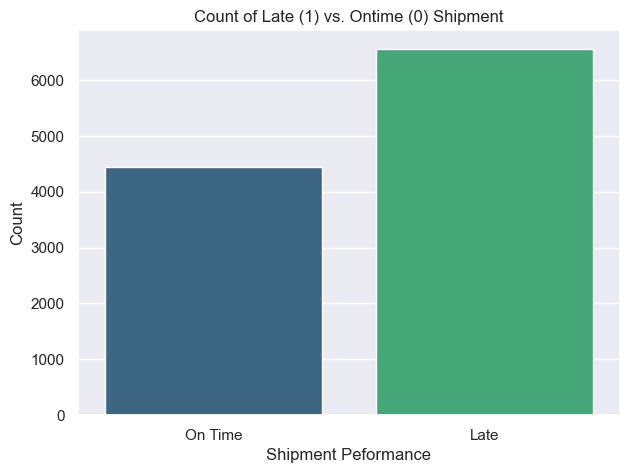

In [69]:
# Compare the number of shipment late (Reached.on.Time_Y.N = 1) and on Time (Reached.on.Time_Y.N = 0)
plt.figure(figsize=(7, 5))
sns.countplot(x='Reached.on.Time_Y.N', data=shipping, hue = 'Reached.on.Time_Y.N', legend = False, palette='viridis')
plt.title('Count of Late (1) vs. Ontime (0) Shipment')
plt.xlabel('Shipment Peformance')
plt.ylabel('Count')
plt.xticks(np.arange(2), ('On Time', 'Late'))
plt.show()

### *Shipment delay is higher than On Time*

In [26]:
# Explore the category features with Shipment Performance (Late vs On time)
# Define a function to validate the relationship between features with Shipment Performance
def bar_charts(df, feature):
    '''
    Inputs:
    df: Dataset
    feature: Name of Feature to Check With Shipment Performance
    '''
    _agg = {
        'ID': 'count'
    }
    _groupby = ['Reached.on.Time_Y.N', feature]

    df_feature = df.groupby(by=_groupby).agg(_agg)

    ax = df_feature.unstack().plot(kind='bar', figsize=(15,6))
    plt.legend(list(df_feature.index.levels[1].unique()))
    plt.xlabel('Shipment Performance')
    plt.xticks(np.arange(2), ('On Time', 'Late'))
    plt.show();

C:\Users\nsk_z\AppData\Local\Temp\ipykernel_33100\1097727729.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_feature = df.groupby(by=_groupby).agg(_agg)


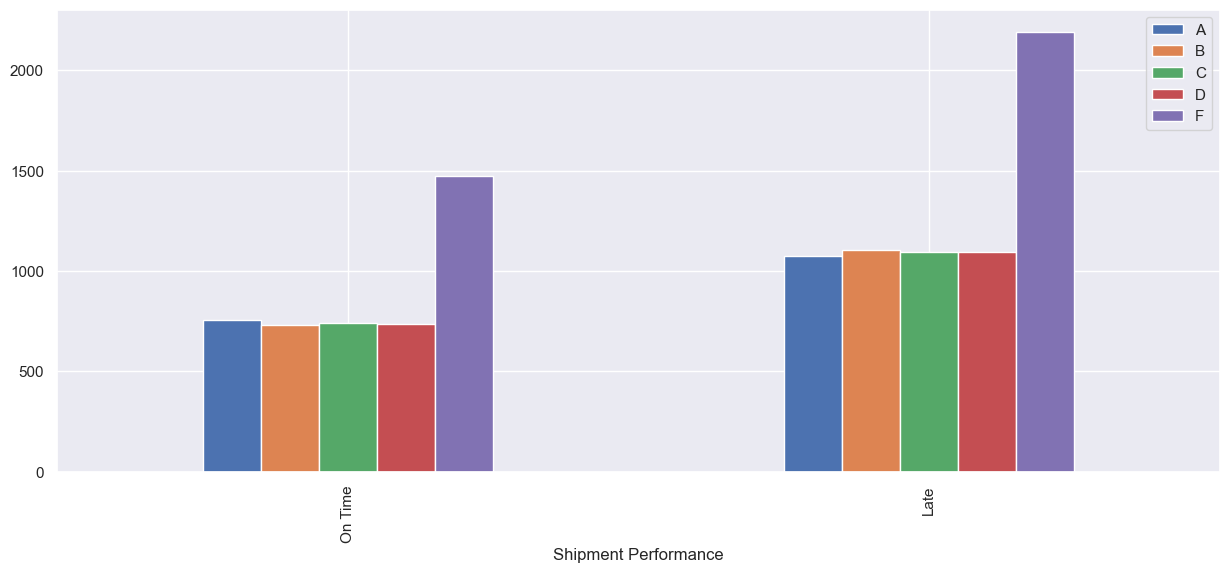

In [28]:
# Check the relationship between "Warehouse_block" with shipment performance
bar_charts(shipping, 'Warehouse_block')

C:\Users\nsk_z\AppData\Local\Temp\ipykernel_33100\1097727729.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_feature = df.groupby(by=_groupby).agg(_agg)


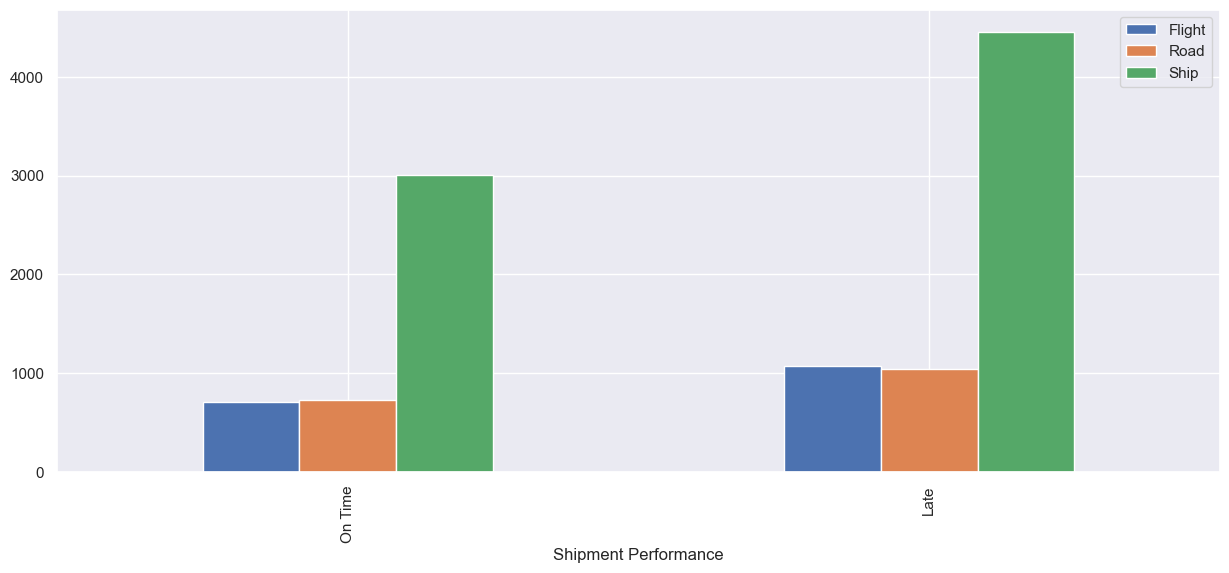

In [30]:
# Check the Mode_of_Shipment vs Shipment Performance (Late vs On Time)
bar_charts(shipping, 'Mode_of_Shipment')

C:\Users\nsk_z\AppData\Local\Temp\ipykernel_33100\1097727729.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_feature = df.groupby(by=_groupby).agg(_agg)


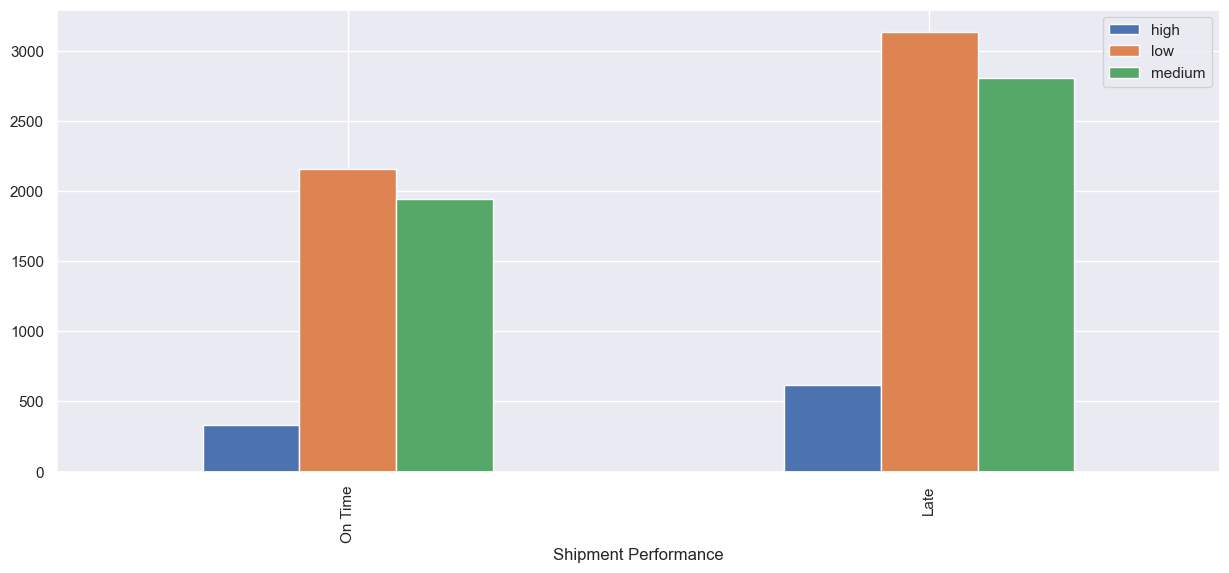

In [32]:
# Check Product_importance vs Shipping Performance 
bar_charts(shipping, 'Product_importance')

C:\Users\nsk_z\AppData\Local\Temp\ipykernel_33100\1097727729.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_feature = df.groupby(by=_groupby).agg(_agg)


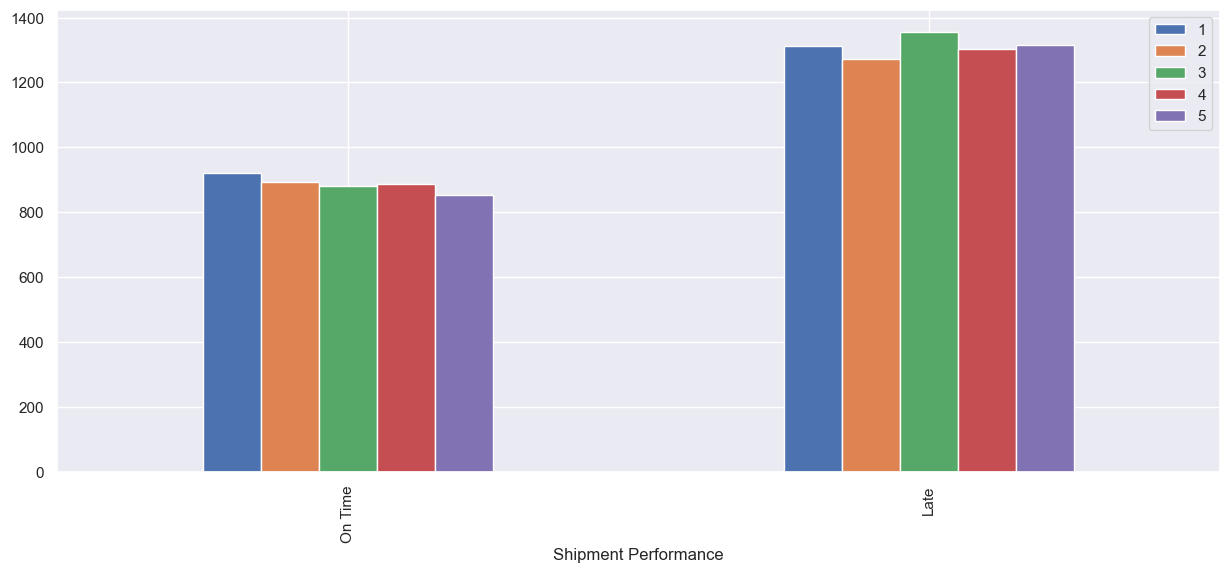

In [34]:
# Check Customer_rating vs shipment performance 
bar_charts(shipping, 'Customer_rating')

### *Features Relationship with Shipment Performance*
- *Warehouse F volume is high, if want the reduce shipment delay, can focus on Warehouse F*
- *Majority of late shipment from Sea ship, can focus on Sea ship for reduction of shipment delay*
- *Low & Medium importance of product causing high delay of volume*
- *No relationship between Customer rating (1-5) with the shipment dalay*

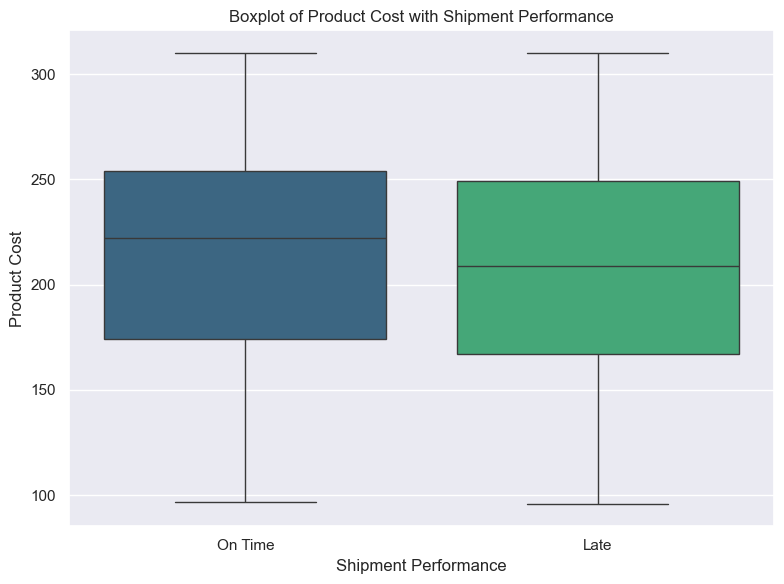

In [37]:
# Check 'Cost_of_the_Product' variables distribution and outlier
plt.figure(figsize=(8, 6))
sns.boxplot(x='Reached.on.Time_Y.N', y='Cost_of_the_Product', hue='Reached.on.Time_Y.N', legend=False, data=shipping, palette='viridis')

#Add title and labels
plt.title('Boxplot of Product Cost with Shipment Performance')
plt.xlabel('Shipment Performance')
plt.ylabel('Product Cost')
plt.xticks(np.arange(2), ('On Time', 'Late'))

#Display Plot
plt.tight_layout() # prevent labels overlapping
plt.show()

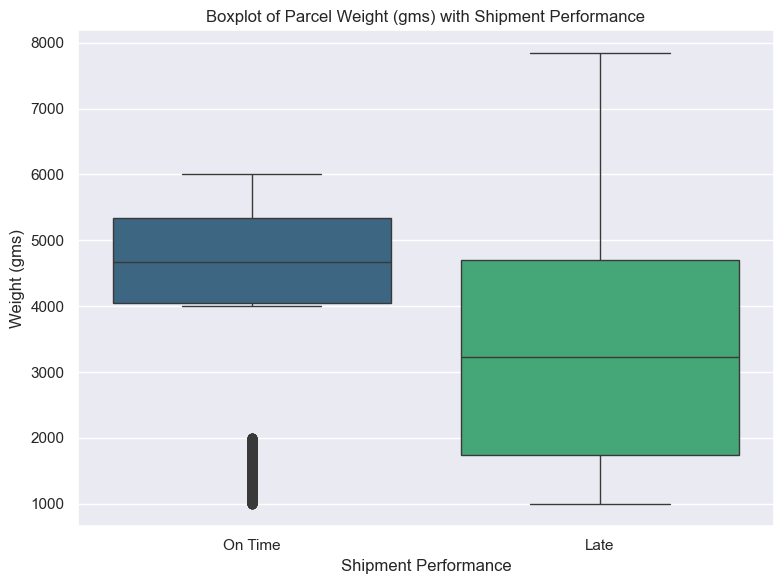

In [39]:
# Check 'Weight_in_gms' variables distribution and outlier
plt.figure(figsize=(8, 6))
sns.boxplot(x='Reached.on.Time_Y.N', y='Weight_in_gms', hue='Reached.on.Time_Y.N', legend=False, data=shipping, palette='viridis')

#Add title and labels
plt.title('Boxplot of Parcel Weight (gms) with Shipment Performance')
plt.xlabel('Shipment Performance')
plt.ylabel('Weight (gms)')
plt.xticks(np.arange(2), ('On Time', 'Late'))

#Display Plot
plt.tight_layout() # prevent labels overlapping
plt.show()

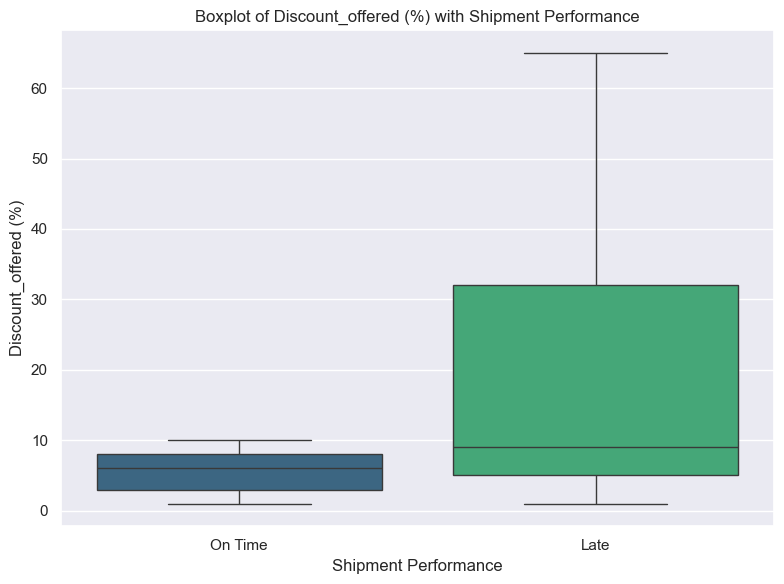

In [41]:
# Check 'Discount_offered' variables distribution and outlier
plt.figure(figsize=(8, 6))
sns.boxplot(x='Reached.on.Time_Y.N', y='Discount_offered', hue='Reached.on.Time_Y.N', legend=False, data=shipping, palette='viridis')

#Add title and labels
plt.title('Boxplot of Discount_offered (%) with Shipment Performance')
plt.xlabel('Shipment Performance')
plt.ylabel('Discount_offered (%)')
plt.xticks(np.arange(2), ('On Time', 'Late'))

#Display Plot
plt.tight_layout() # prevent labels overlapping
plt.show()

### *Features Relationship with Shipment Performance*
- *Product cost seems like no impact on shipment performance*
- *There are outlier parcels' weight for On Time shipment*
- *Most of the less discount products are On Time Shipment*


In [44]:
# Remove "ID" column for correlation analysis because ID column doesn't carries any function on analysis
shipping_new = shipping.drop(['ID'], axis =1)

In [46]:
# Show correlation of numeric Value
corr_matrix = shipping_new.corr(numeric_only = True)
print(f"Correlation Matrix (Pairwise): \n {corr_matrix}")
    

Correlation Matrix (Pairwise): 
                      Customer_care_calls  Cost_of_the_Product  \
Customer_care_calls             1.000000             0.323182   
Cost_of_the_Product             0.323182             1.000000   
Prior_purchases                 0.180771             0.123676   
Discount_offered               -0.130750            -0.138312   
Weight_in_gms                  -0.276615            -0.132604   

                     Prior_purchases  Discount_offered  Weight_in_gms  
Customer_care_calls         0.180771         -0.130750      -0.276615  
Cost_of_the_Product         0.123676         -0.138312      -0.132604  
Prior_purchases             1.000000         -0.082769      -0.168213  
Discount_offered           -0.082769          1.000000      -0.376067  
Weight_in_gms              -0.168213         -0.376067       1.000000  


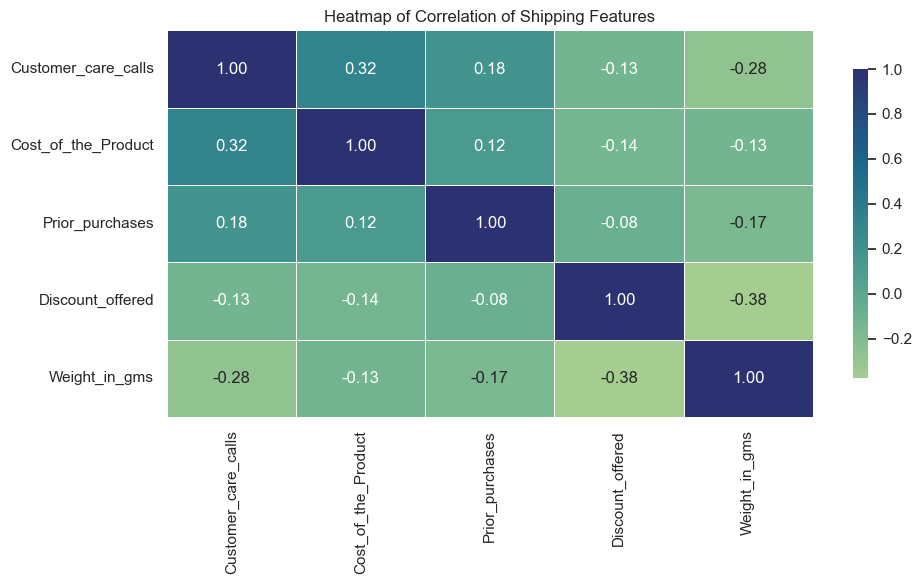

In [48]:
# plot the heatmap of correlation
sns.heatmap(
    corr_matrix,
    annot = True, # Displaying correlation value inside the heatmap cells
    cmap = 'crest',
    fmt = '.2f', # Displaying 2 decimal correlation value
    linewidth = 0.5,
    cbar_kws={"shrink": 0.8} #Shrink the colorbar to fit better
)

# Display the plot
plt.title('Heatmap of Correlation of Shipping Features')
plt.tight_layout()
plt.show()

### *The correlation between numerical variables not high*

## Hypothesis Testing

### Define Hypothesis

> Formulate the null hypothesis H_0 (commonly, that the observations are the result of pure chance) and the alternative hypothesis H_a (commonly, that the observations show a real effect combined with a component of chance variation).

    Null Hypothesis (H0): There is no difference in the Shipping Performance for new and repeated customer.

    Alternative Hypothesis (HA): There is a difference in the Shipping Performance for new and repeated customer.

In [52]:
N=100

# Create set of data (shipment late = 1)
shipping_late = shipping[shipping['Reached.on.Time_Y.N']==1]
# Set the sample size of shipping_late = 100
shipping_late = shipping_late.sample(N, random_state = 12)

# # Create set of data (shipment on-time = 0)
shipping_ontime = shipping[shipping['Reached.on.Time_Y.N']==0]
# Set the sample size of shipping_late = 100
shipping_ontime = shipping_ontime.sample(N, random_state = 12)

In [54]:
a = shipping_late['Prior_purchases']
b = shipping_ontime['Prior_purchases']

In [56]:
# Set alpha = 0.05
alpha = 0.05

In [58]:
## Calculate the variance to get the standard deviation
var_a = a.var(ddof = 1)
var_b = b.var(ddof = 1)

## Calculate the Standard Deviation
s = np.sqrt((var_a + var_b)/2)

In [60]:
## Calculate the t-statistic
t = (a.mean() - b.mean())/(s*np.sqrt(2/N))

In [62]:
def print_sig(p_value, alpha):
    if p_value < alpha:
        print("We reject our null hypothesis.")
    else:
        print("We fail to reject our null hypothesis.")

In [64]:
## Cross Checking with the internal scipy function
import scipy.stats as stats
t2, p2 = stats.ttest_ind(a,b)
print("t = " + str(t2))
print("p = " + str(p2))

print_sig(p2, alpha)

t = -1.1034477661239168
p = 0.2711720441579604
We fail to reject our null hypothesis.


### *There is no difference in shipping performance between new (low Prior_Purchase) and repeated customer (high Prior_Purchase)*